In [ ]:
! pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 5.54k/5.54k [00:00<00:00, 1.48MB/s]

# Import libraries

In [ ]:
import smtplib
from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
import pandas as pd
import numpy as np
import time
import datetime 
%matplotlib inline
import matplotlib.pyplot as plt
from subprocess import check_output
pd.options.display.max_colwidth = 1000
from time import gmtime, strftime
Time_now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
import timeit
start = timeit.default_timer()
pd.options.display.max_rows = 100


# Read the data

In [ ]:
df = pd.read_csv('xAPI-Edu-Data/xAPI-Edu-Data.csv')

# Describe the data

In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


# Categorical features

In [ ]:
categorical_features = (df.select_dtypes(include=['object']).columns.values)
categorical_features

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

# Numerical Features

In [ ]:
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion'], dtype=object)

# Correlations between numerical features

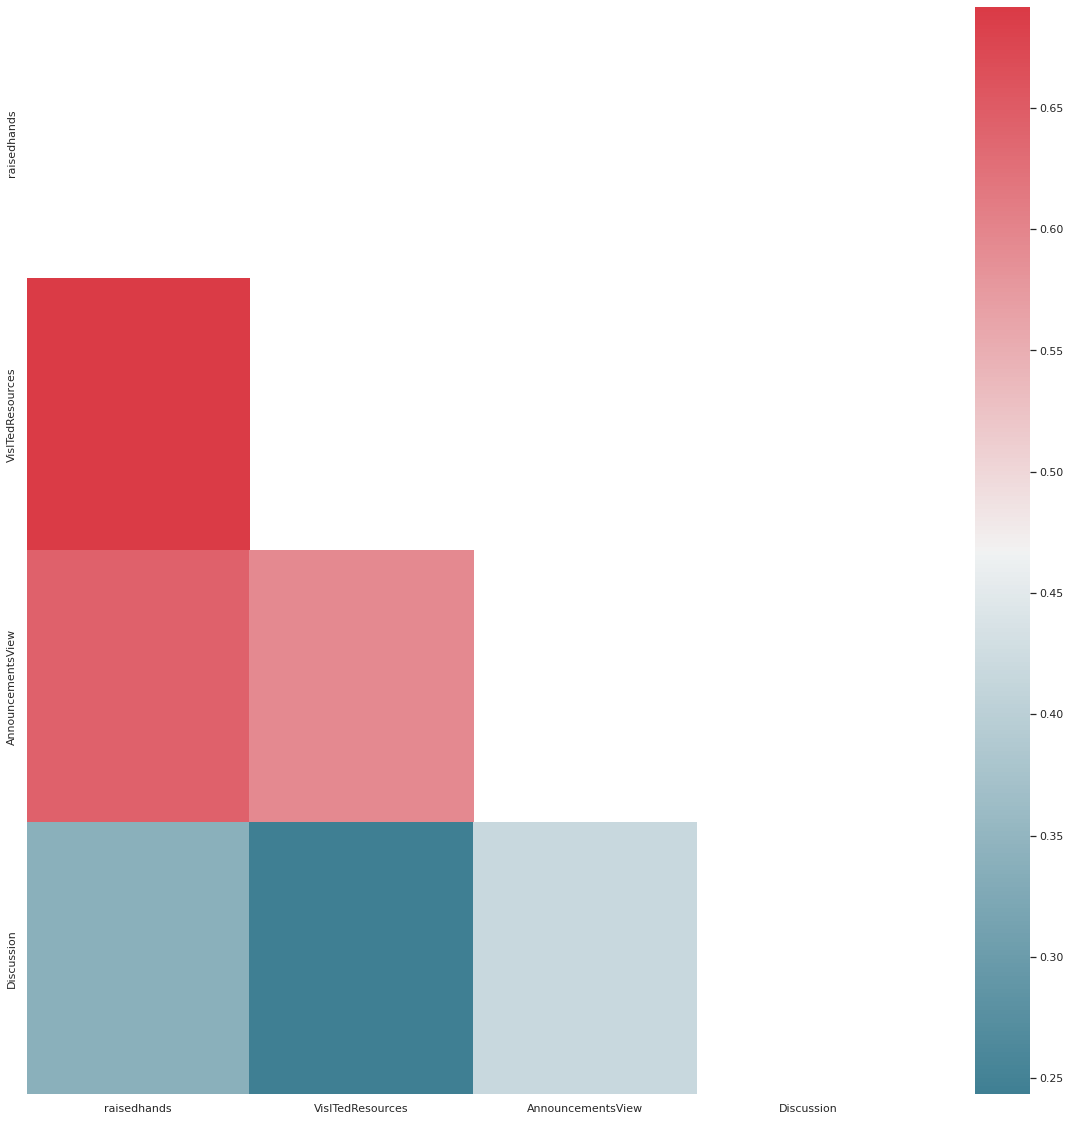

In [ ]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(20, 20))
    mask = np.zeros_like(corrs_mat, dtype=bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = df.corr()
#variable_correlations
heat_map(variable_correlations)

## 1_2 EDA(Exploratory Data Analysis)

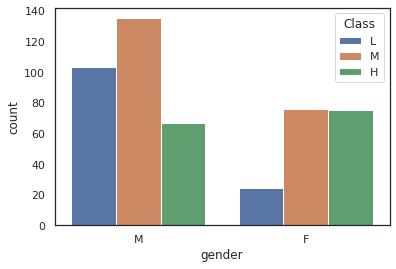

In [ ]:
sns.countplot(data=df,x='gender',hue='Class',hue_order=['L','M','H'])    

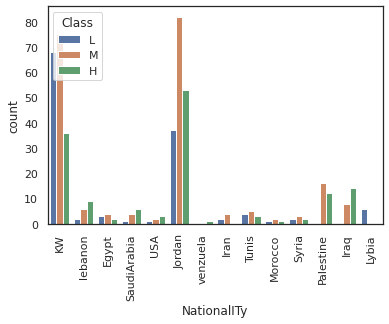

In [ ]:
sns.countplot(data=df,x='NationalITy',hue='Class',hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.show()

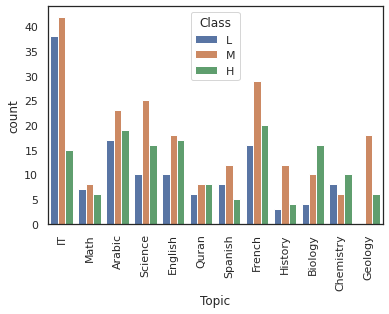

In [ ]:
sns.countplot(data=df,x='Topic',hue='Class',hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.show()

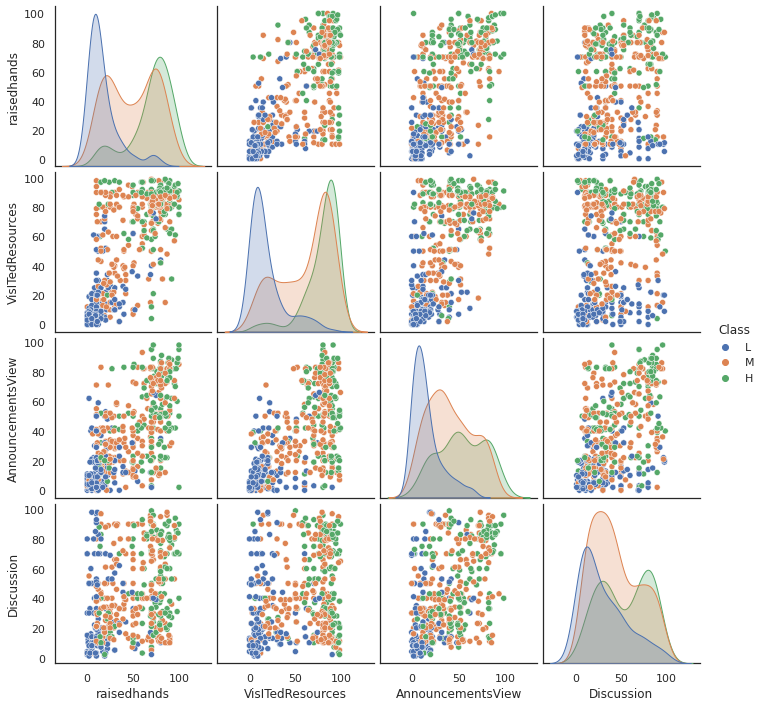

In [ ]:
df_small = df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion','Class']]
sns.pairplot(df_small, hue='Class',hue_order=['L','M','H'])

# Parent School Satisfaction Prediction and Hypertuned Machine Learning Models
\

In [ ]:
df_copy = pd.get_dummies(df)
df_copy.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7,Class_H,Class_L,Class_M
0,15,16,2,20,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,20,20,3,25,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,10,7,0,30,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
df1 = df_copy
Y = df1['ParentschoolSatisfaction_Good'].values
df1 = df1.drop(['ParentschoolSatisfaction_Good'],axis=1)
x = df1.values
Xtrain, Xtest, ytrain, ytest = train_test_split(x, Y, test_size=0.50)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

parameter = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
             'gamma' : ['scale','auto'],
             'C' : [0.9,1,1.1]}
SVM_model = SVC()
clf1 = GridSearchCV(SVM_model, parameter)
clf1.fit(x, Y)
print(clf1.best_params_)

parameter = {'n_neighbors': [5,7,10,15], 
             'weights' : ['uniform', 'distance'],
             'metric' : ['cityblock', 'cosine', 'euclidean']}
KNN_model = KNeighborsClassifier()
clf2 = GridSearchCV(KNN_model, parameter)
clf2.fit(x, Y)
print(clf2.best_params_)

parameter = {'penalty': ['l1','l2'], 
             'C' : [1.1, 1, 0.9],
             'solver' : ['lbfgs','liblinear','newton-cg']}
LR_model = LogisticRegression()
clf3 = GridSearchCV(LR_model, parameter)
clf3.fit(x, Y)
print(clf3.best_params_)

{'C': 0.9, 'gamma': 'scale', 'kernel': 'linear'}
{'metric': 'cityblock', 'n_neighbors': 15, 'weights': 'uniform'}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{'C': 1.1, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

In [ ]:
print(clf1.best_params_)
print(clf2.best_params_)
print(clf3.best_params_)

{'C': 0.9, 'gamma': 'scale', 'kernel': 'linear'}
{'metric': 'cityblock', 'n_neighbors': 15, 'weights': 'uniform'}
{'C': 1.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
pd.DataFrame(clf3.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.036033,0.021229,0.000667,0.000366,0.9,l2,newton-cg,"{'C': 0.9, 'penalty': 'l2', 'solver': 'newton-cg'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.002287,0.000422,0.000590,0.000348,1.1,l1,liblinear,"{'C': 1.1, 'penalty': 'l1', 'solver': 'liblinear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
15,0.030071,0.003801,0.000881,0.000290,0.9,l2,lbfgs,"{'C': 0.9, 'penalty': 'l2', 'solver': 'lbfgs'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.034263,0.008929,0.000915,0.000370,1.1,l2,lbfgs,"{'C': 1.1, 'penalty': 'l2', 'solver': 'lbfgs'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.004450,0.001706,0.000368,0.000092,1.1,l2,liblinear,"{'C': 1.1, 'penalty': 'l2', 'solver': 'liblinear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.026850,0.001879,0.000450,0.000016,1.1,l2,newton-cg,"{'C': 1.1, 'penalty': 'l2', 'solver': 'newton-cg'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
7,0.002339,0.000559,0.000413,0.000162,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
16,0.003432,0.000124,0.000284,0.000007,0.9,l2,liblinear,"{'C': 0.9, 'penalty': 'l2', 'solver': 'liblinear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
9,0.031760,0.005538,0.000911,0.000086,1,l2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
10,0.003733,0.000210,0.000393,0.000077,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

classifiers = [('KNeighborsClassifier', KNeighborsClassifier(metric='cityblock',n_neighbors=15,weights='uniform',n_jobs=-1)),
               ('LogisticRegression', LogisticRegression(C=1.1, penalty='l1',solver='liblinear')),
               ('SVC', SVC(C=0.9,gamma='scale',kernel='linear'))
              ]
allscores = []


for name, classifier in classifiers:
    scores = []
    for i in range(20): # 20 runs
        roc = cross_val_score(classifier, x, Y)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

KNeighborsClassifier 0.6770833333333331
LogisticRegression 1.0
SVC 1.0


# Student Class Prediction and Ensemble Model

In [ ]:
# Read the data
df = pd.read_csv('/content/xAPI-Edu-Data/xAPI-Edu-Data.csv')

In [ ]:
# Preprocessing
# Change the categical data into numeric data
df['Class_value'] = df['Class'].map(dict(L=-1,M=0,H=1))

In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [ ]:
# One-hot encoding for the categorical features
X = pd.get_dummies(df.drop(['ParentschoolSatisfaction','Class','Relation','ParentAnsweringSurvey'],axis=1),
                   columns=['gender', 'NationalITy', 'PlaceofBirth','StageID',
                            'GradeID','SectionID', 'Topic', 'Semester','StudentAbsenceDays'],
                  drop_first = True)
y = df['Class']

In [ ]:
from sklearn.metrics import confusion_matrix
def model_Evaluate(model):
    acc_train=model.score(X_train, y_train)
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories  = ['Low','Medium','High']
    sns.heatmap(cf_matrix, annot = True, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
# Machine Learning Process
# Split the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

model_lr = LogisticRegression(C=1.1, penalty='l1',solver='liblinear')
model_lr.fit(X_train,y_train)


LogisticRegression(C=1.1, penalty='l1', solver='liblinear')

Accuracy of model on training data : 99.73958333333334
Accuracy of model on testing data : 98.95833333333334 



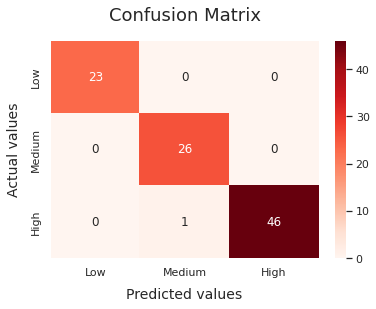

In [ ]:
# Logistic Regression
model_Evaluate(model_lr)

Accuracy of model on training data : 100.0
Accuracy of model on testing data : 100.0 



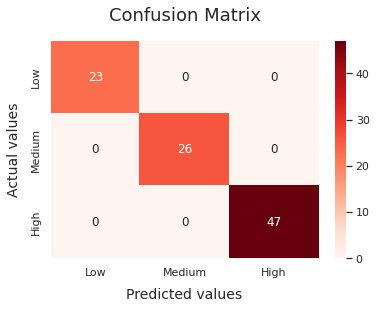

In [ ]:
# SVM
model_svm=SVC(C=0.9,gamma='scale',kernel='linear')
model_svm.fit(X_train, y_train)
model_Evaluate(model_svm)

Accuracy of model on training data : 71.35416666666666
Accuracy of model on testing data : 71.875 



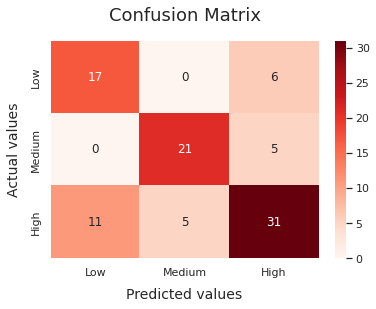

In [ ]:
# KNN
model_knn=KNeighborsClassifier(metric='cityblock',n_neighbors=15,weights='uniform',n_jobs=-1)
model_knn.fit(X_train, y_train)
model_Evaluate(model_knn)

Accuracy of model on training data : 99.73958333333334
Accuracy of model on testing data : 98.95833333333334 



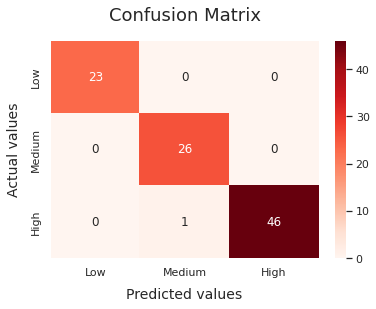

In [ ]:
# Ensemble learning
from sklearn.ensemble import VotingClassifier
Ens = VotingClassifier( estimators= [('LG',model_lr),('SVM',model_svm),('KNN',model_knn)], voting = 'hard')
Ens.fit(X_train,y_train)
model_Evaluate(Ens)